## Initial Exploratory Data Analysis


In [ ]:
##Installing the libraries
install.packages("tidyverse", repos="https://cloud.r-project.org")
library(tidyverse)
library(dplyr)
library(ggplot2)
library(readr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# Load libraries
library(tidyverse)
df <- read_csv("vispdat_cleaned.csv")

summary(df)

#  Overall counts & proportions
df %>%
  count(`Race/Ethnicity`) %>%
  mutate(pct = n / sum(n) * 100) %>%
  arrange(desc(n))

df %>%
  count(Gender) %>%
  mutate(pct = n / sum(n) * 100)

df %>%
  count(Age_group_at_assessment) %>%
  mutate(pct = n / sum(n) * 100)

df %>%
  count(Housing_destination) %>%
  mutate(pct = n / sum(n) * 100)

Rows: 129845 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Race/Ethnicity, Gender, Age_group_at_assessment, Housing_destination
dbl (2): Unique_client_ID, TOTAL_SCORE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 129,845
Columns: 6
$ Unique_client_ID        <dbl> 1, 3, 4, 6, 7, 10, 13, 16, 17, 18, 19, 20, 21,…
$ `Race/Ethnicity`        <chr> "Latino", "Latino", "White", "Black", "Black",…
$ Gender                  <chr> "Female", "Male", "Male", "Male", "Female", "F…
$ Age_group_at_assessment <chr> "25-44", "25-44", "45-59", "45-59", "60+", "45…
$ TOTAL_SCORE             <dbl> 11, 15, 12, 7, 10, 6, 16, 8, 5, 6, 9, 7, 9, 11…
$ Housing_destination     <chr> "Matched to Permanent Housing, Not Yet Housed"…


 Unique_client_ID Race/Ethnicity        Gender          Age_group_at_assessment
 Min.   :     1   Length:129845      Length:129845      Length:129845          
 1st Qu.: 38776   Class :character   Class :character   Class :character       
 Median : 81450   Mode  :character   Mode  :character   Mode  :character       
 Mean   : 80645                                                                
 3rd Qu.:121807                                                                
 Max.   :160740                                                                
  TOTAL_SCORE     Housing_destination
 Min.   : 0.000   Length:129845      
 1st Qu.: 6.000   Class :character   
 Median : 9.000   Mode  :character   
 Mean   : 8.769                      
 3rd Qu.:12.000                      
 Max.   :17.000                      

Race/Ethnicity,n,pct
<chr>,<int>,<dbl>
Black,55691,42.890369
Latino,41293,31.801764
White,30860,23.766799
Asian,2001,1.541068


Gender,n,pct
<chr>,<int>,<dbl>
Female,45364,34.93704
Male,84481,65.06296


Age_group_at_assessment,n,pct
<chr>,<int>,<dbl>
18-24,15869,12.2214949
25-44,50609,38.9764719
45-59,41449,31.9219069
60+,21367,16.4557742
Under 18,389,0.2995880
NA,162,0.1247641


Housing_destination,n,pct
<chr>,<int>,<dbl>
Assessed Only,11755,9.05310178
"Currently active in ""Coordinated Entry"" program",3441,2.65008279
"Currently active in ""Day Shelter"" program",892,0.68697293
"Currently active in ""Emergency Shelter"" program",3485,2.68396935
"Currently active in ""Homelessness Prevention"" program",203,0.15634025
"Currently active in ""Other"" program",71,0.05468058
"Currently active in ""PH - Housing with Services (no disability required for entry)"" program",10,0.00770149
"Currently active in ""PH - Permanent Supportive Housing (disability required for entry)"" program",205,0.15788055
"Currently active in ""PH - Rapid Re-Housing"" program",670,0.51599985


Race/Ethnicity,Gender,n,pct
<chr>,<chr>,<int>,<dbl>
Asian,Female,688,34.38281
Asian,Male,1313,65.61719
Black,Female,20189,36.25182
Black,Male,35502,63.74818
Latino,Female,14156,34.28184
Latino,Male,27137,65.71816
White,Female,10331,33.47699
White,Male,20529,66.52301


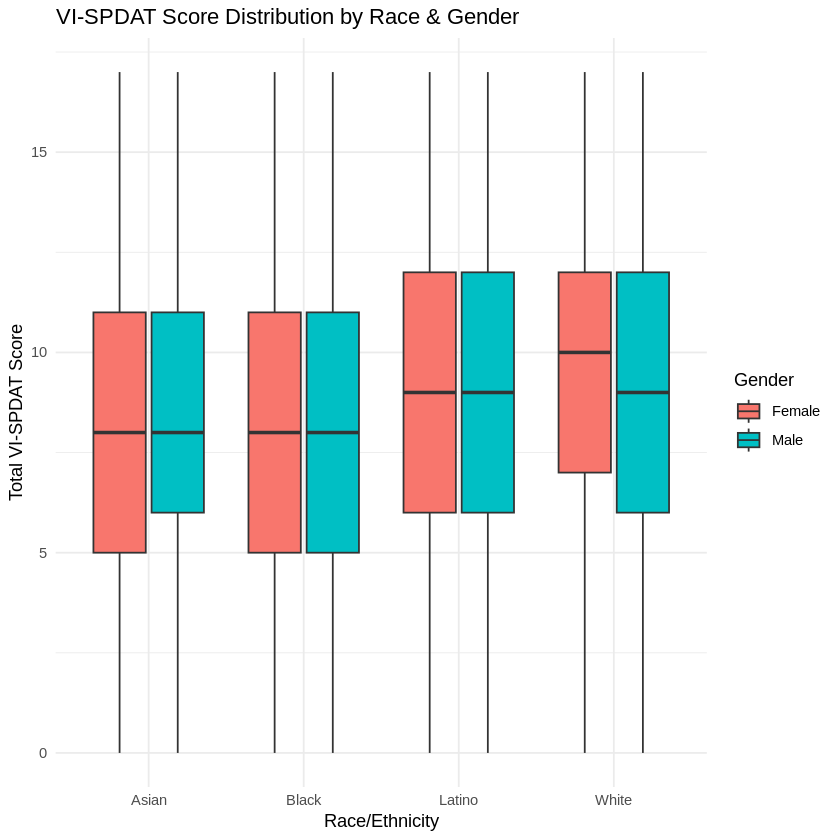

In [ ]:
# how many by race & gender
df %>%
  count(`Race/Ethnicity`, Gender) %>%
  group_by(`Race/Ethnicity`) %>%
  mutate(pct = n / sum(n) * 100) %>%
  ungroup()

# how many scores by each group
# Boxplot of total_score by race + gender
ggplot(df, aes(x = `Race/Ethnicity`, y = TOTAL_SCORE, fill = Gender)) +
  geom_boxplot(outlier.size = 0.5) +
  labs(
    title = "VI-SPDAT Score Distribution by Race & Gender",
    x = "Race/Ethnicity", y = "Total VI-SPDAT Score"
  ) +
  theme_minimal()


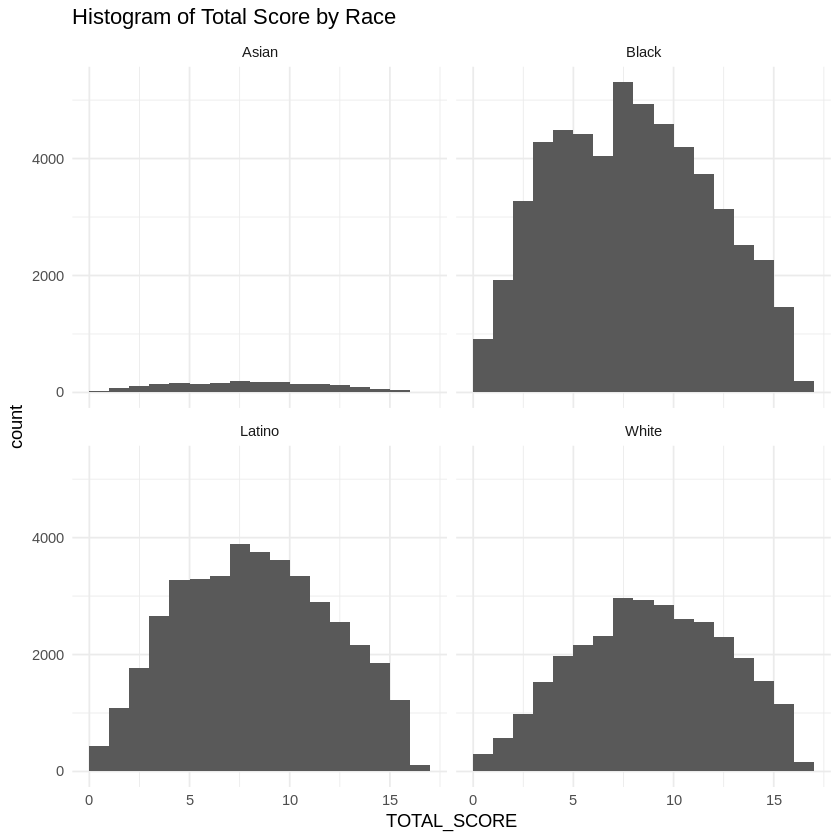

In [ ]:
# Histogram of total_score faceted by race
ggplot(df, aes(x = TOTAL_SCORE)) +
  geom_histogram(binwidth = 1, boundary = 0) +
  facet_wrap(~ `Race/Ethnicity`) +
  labs(title = "Histogram of Total Score by Race") +
  theme_minimal()

`summarise()` has grouped output by 'Race/Ethnicity'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Age_group_at_assessment'. You can override
using the `.groups` argument.


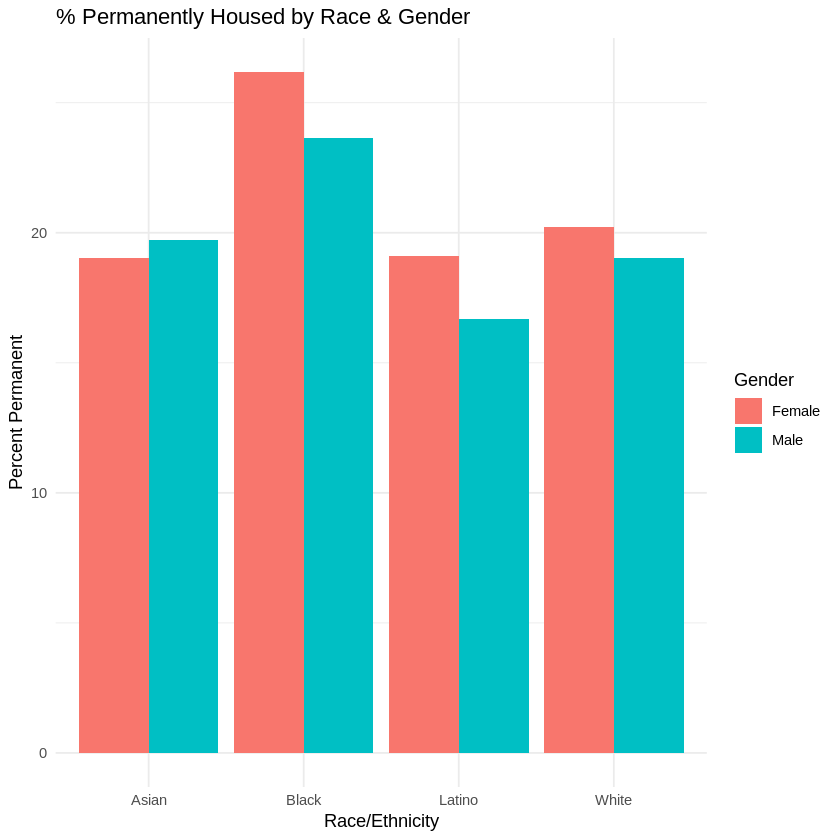

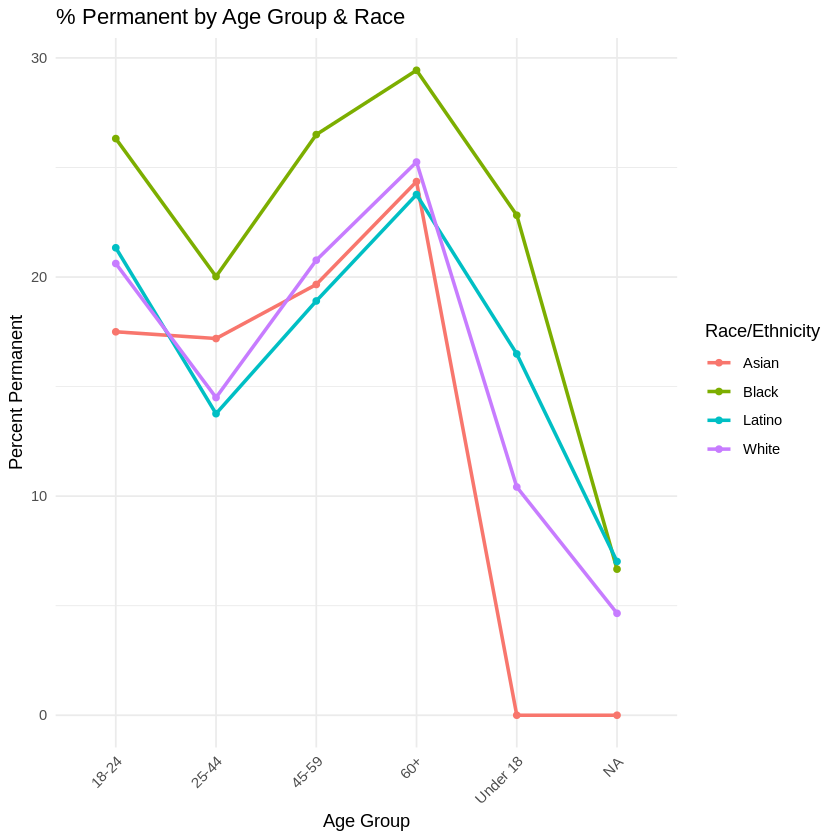

In [ ]:
#O utcomes by race and gender (how many people got housed)
# Housing outcome by subgroup
# percent Permanent by race & gender
df %>%
  group_by(`Race/Ethnicity`, Gender) %>%
  summarise(
    n      = n(),
    pct_perm = mean(Housing_destination == "Permanently Housed") * 100
  ) %>%
  ggplot(aes(x = `Race/Ethnicity`, y = pct_perm, fill = Gender)) +
    geom_col(position = "dodge") +
    labs(
      title = "% Permanently Housed by Race & Gender",
      x = "Race/Ethnicity", y = "Percent Permanent"
    ) +
    theme_minimal()

# Ages for each person by race
df %>%
  group_by(Age_group_at_assessment, `Race/Ethnicity`) %>%
  summarise(
    n        = n(),
    pct_perm = mean(Housing_destination == "Permanently Housed") * 100
  ) %>%
  ggplot(aes(x = Age_group_at_assessment, y = pct_perm, color = `Race/Ethnicity`, group = `Race/Ethnicity`)) +
    geom_line(linewidth = 1) +
    geom_point() +
    labs(
      title = "% Permanent by Age Group & Race",
      x = "Age Group", y = "Percent Permanent"
    ) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
df %>%
  filter(Housing_destination == "Permanently Housed") %>%
  dplyr::count(Age_group_at_assessment) %>%
  dplyr::arrange(Age_group_at_assessment)

Age_group_at_assessment,n
<chr>,<int>
18-24,3739
25-44,8352
45-59,9417
60+,5718
Under 18,70
NA,10


In [ ]:
##Summary
##Summary
eda_summary <- df %>%
  group_by(`Race/Ethnicity`, Gender, Age_group_at_assessment) %>%
  summarise(.groups = "keep",
    n              = n(),
    avg_score      = mean(TOTAL_SCORE),
    sd_score       = sd(TOTAL_SCORE),
    pct_perm       = mean(Housing_destination == "Permanently Housed") * 100
  )
  write_csv(eda_summary, "eda_summary_by_subgroup.csv")